# 1. Localise the Screen

In [316]:
#### Localize the LCD on the thermostat 

# import the necessary packages
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
from imutils import contours
from PIL import Image

import numpy as np
import imutils
import cv2
import os

# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {(1, 1, 1, 0, 1, 1, 1): 0,
                 (0, 0, 1, 0, 0, 1, 0): 1,
                 (1, 0, 1, 1, 1, 1, 0): 2,
                 (1, 0, 1, 1, 0, 1, 1): 3,
                 (0, 1, 1, 1, 0, 1, 0): 4,
                 (1, 1, 0, 1, 0, 1, 1): 5,
                 (1, 1, 0, 1, 1, 1, 1): 6,
                 (1, 0, 1, 0, 0, 1, 0): 7,
                 (1, 1, 1, 1, 1, 1, 1): 8,
                 (1, 1, 1, 1, 0, 1, 1): 9
                }
folder = os.path.join(os.getcwd(), "test_hq_1")
image_list = []
for file in os.listdir(folder):
    image_list.append(file)
image_list = image_list[1:]
print(image_list)

['503c6f058305af8803290cfd7b101f61060ede87.jpg', '3783acb95a917cf46cd7dc0fdcf9466cc98707bb.jpg', 'ed19955cfa901c23e20ba492411e34906586436e.jpg', 'e834fadd3461bb593a7d2d72885f8d2319480b87.jpg', '9879e8fcac36d3a82bea304b0af56bde5533f5f1.jpg']


# 2. Test centering on results

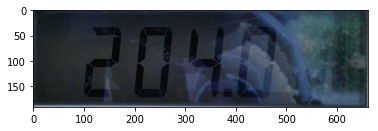

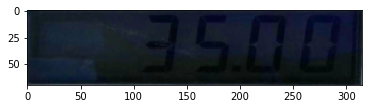

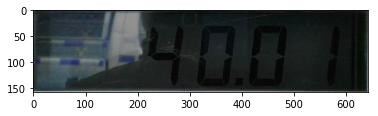

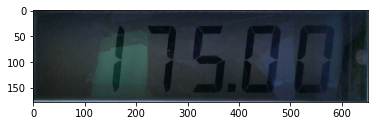

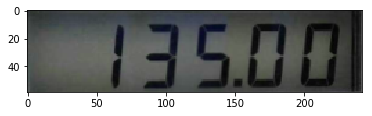

In [36]:
for file in image_list:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break

    # extract the thermostat display, apply a perspective transform
    # to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    plt.imshow(output)
    plt.show()

## 1.1 Increase brightness 

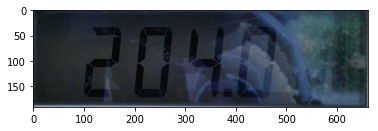

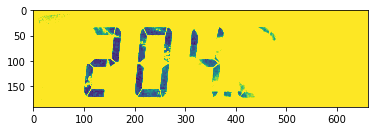

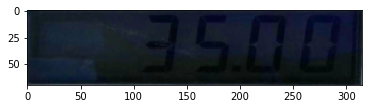

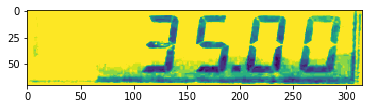

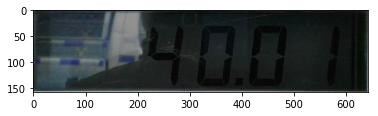

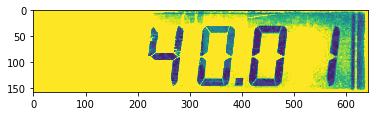

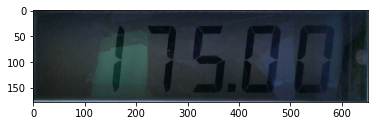

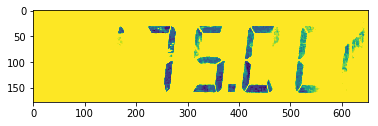

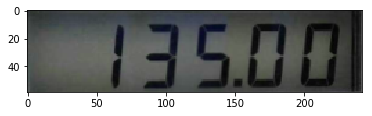

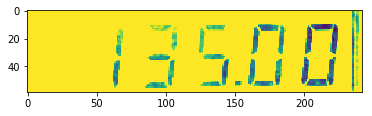

In [58]:
for file in image_list:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break

    # extract the thermostat display, apply a perspective transform
    # to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    plt.imshow(output)
    plt.show()
    
    output_bright_RGB = cv2.addWeighted(output, 10, output, 0,0)
    output_bright_grey = cv2.addWeighted(warped, 10, warped, 0,0)
    plt.imshow(output_bright_grey)
    plt.show()

## 1.2 Black and white 

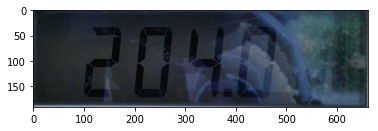

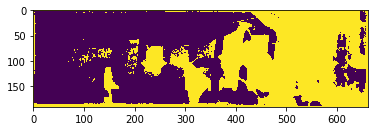

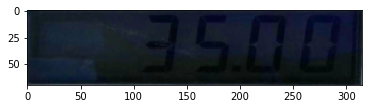

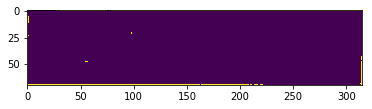

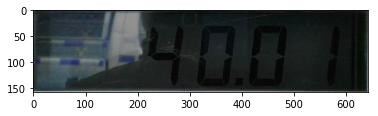

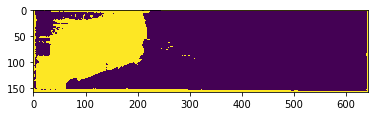

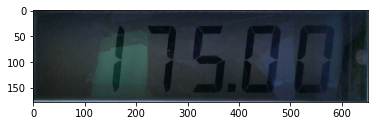

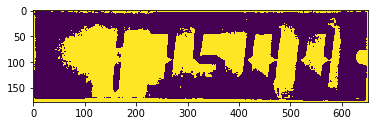

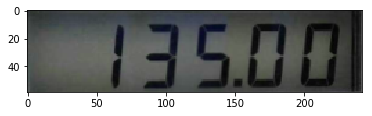

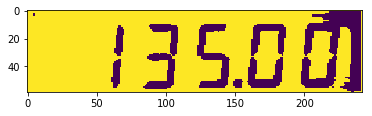

In [53]:
for file in image_list:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break

    # extract the thermostat display, apply a perspective transform
    # to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    
    plt.imshow(output)
    plt.show()
    
    (thresh, blackAndWhiteImage) = cv2.threshold(output, 50, 255, cv2.THRESH_BINARY)
    (thresh, blackAndWhiteImage_grey) = cv2.threshold(warped, 50, 255, cv2.THRESH_BINARY)

    plt.imshow(blackAndWhiteImage_grey)
    plt.show()

## 1.3 Reduce Glare and Increase brightness

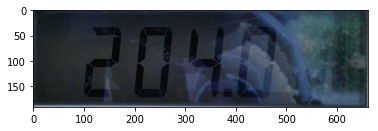

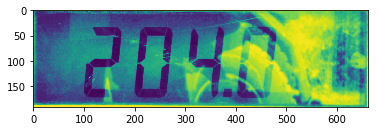

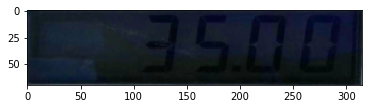

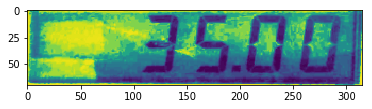

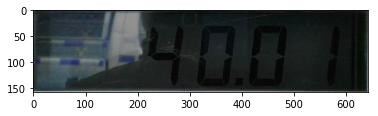

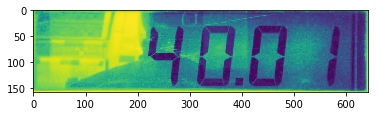

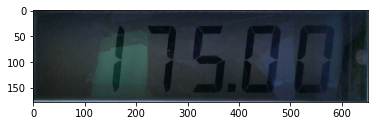

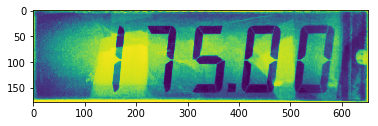

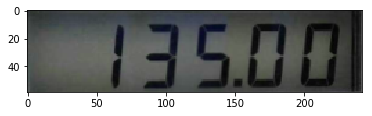

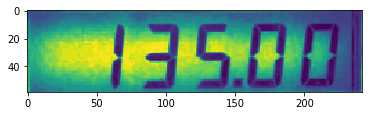

In [213]:
for file in image_list:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break

    # extract the thermostat display, apply a perspective transform
    # to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    
    plt.imshow(output)
    plt.show()
    
    output_hist = cv2.equalizeHist(warped)
    output_bright = cv2.addWeighted(output_hist, 10, output_hist, 0,0)
    plt.imshow(output_hist)
    plt.show()   



# 3 Recognising digits

[[[144 122]]

 [[158 313]]

 [[793 274]]

 [[806 123]]]


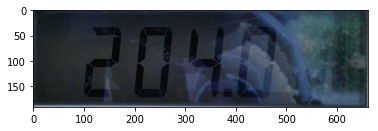

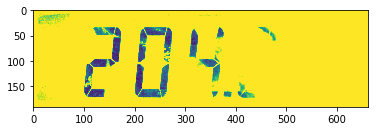

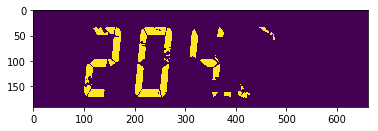

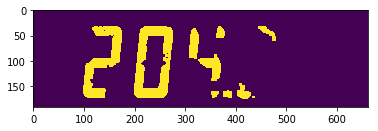

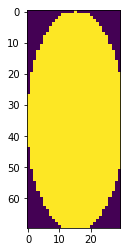

case 1 mean:54.24863573812499


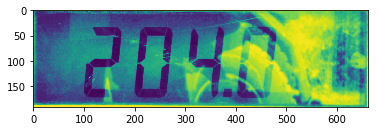

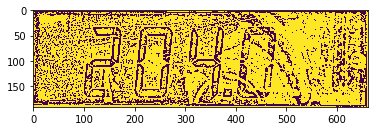

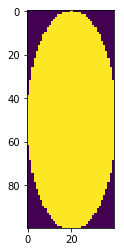

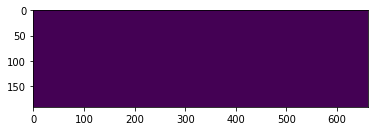

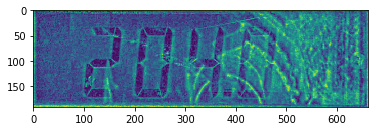

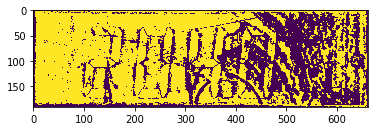

In [279]:
for file in image_list[0:1]:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break
    
    print(displayCnt)
    
    # extract the thermostat display, apply a perspective transform
    # to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    plt.imshow(output)
    plt.show()
    
    
    output_bright_RGB = cv2.addWeighted(output, 9, output, 0,0)
    output_bright_grey = cv2.addWeighted(warped, 9, warped, 0,0)
    plt.imshow(output_bright_grey)
    plt.show()
    
    # threshold the warped image,
    thresh = cv2.threshold(output_bright_grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    plt.imshow(thresh)
    plt.show()
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(thresh,kernel,iterations = 1)
    plt.imshow(dilation)
    plt.show()
    
    # apply a series of morphological operations to cleanup the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 70))
    plt.imshow(kernel)
    plt.show()
    dilation = cv2.dilate(output_bright_grey,kernel,iterations = 1)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >= 75 and h <= 150):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)
        plt.imshow(digit)
        plt.show()
        
    print("case 1 mean:" + str(np.mean(warped)))
    output_hist = cv2.equalizeHist(warped)
    plt.imshow(output_hist)
    plt.show()
    th3 = cv2.adaptiveThreshold(output_hist, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)    
    plt.imshow(th3)
    plt.show()
    kernel = np.ones((5,5),np.uint8)
    
       # apply a series of morphological operations to cleanup the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 100))
    plt.imshow(kernel)
    plt.show()
    thresh = cv2.morphologyEx(th3, cv2.MORPH_OPEN, kernel)
    plt.imshow(thresh)
    plt.show()    
    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >= 75 and h <= 150):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)
        plt.imshow(digit)
        plt.show()
        
        
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(75,75))
    cl1 = clahe.apply(warped)
    plt.imshow(cl1)
    plt.show()
    
    thresh = cv2.threshold(cl1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    plt.imshow(thresh)
    plt.show()    
    ernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 15))
    thresh = cv2.morphologyEx(cl1, cv2.MORPH_OPEN, kernel)

    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >= 75 and h <= 150):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)


[[[144 122]]

 [[158 313]]

 [[793 274]]

 [[806 123]]]


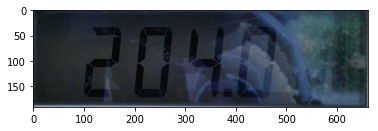

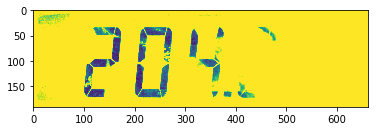

TypeError: only size-1 arrays can be converted to Python scalars

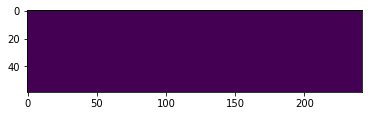

## Increase brightness and dilate results

[[[144 122]]

 [[158 313]]

 [[793 274]]

 [[806 123]]]


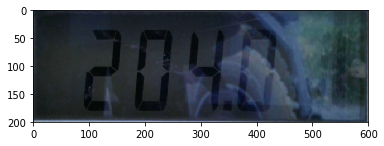

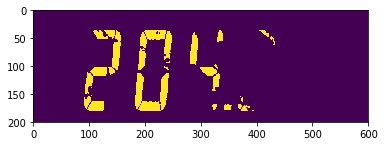

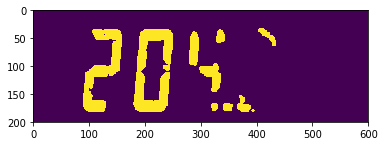

x:180
y:34
w:71
h:148


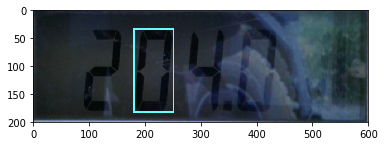

x:89
y:34
w:71
h:148


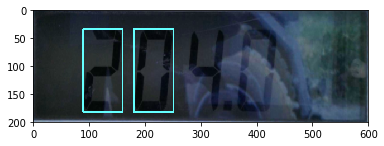

[[[269 188]]

 [[275 258]]

 [[580 262]]

 [[584 192]]]


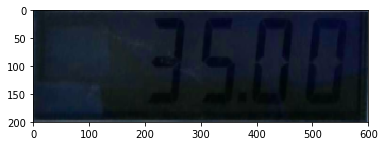

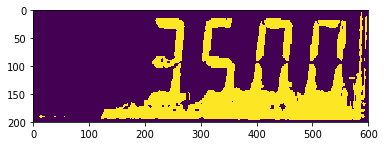

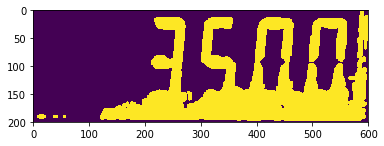

[[[126 176]]

 [[134 333]]

 [[769 335]]

 [[769 179]]]


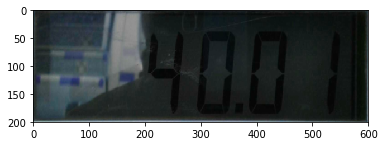

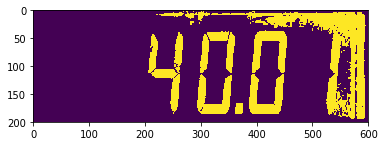

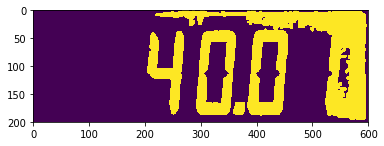

x:204
y:37
w:67
h:150


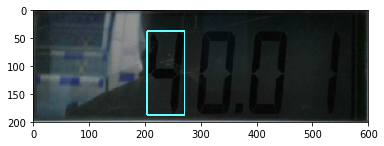

x:292
y:36
w:72
h:152


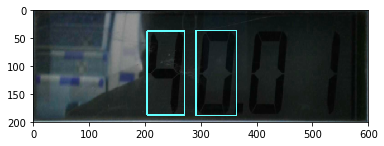

[[[104 110]]

 [[106 288]]

 [[734 296]]

 [[755 151]]]


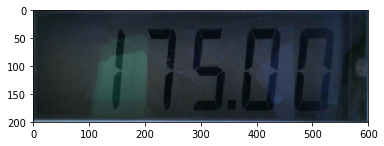

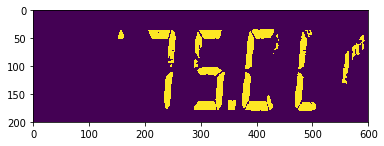

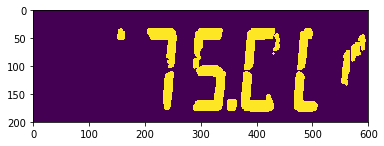

x:286
y:33
w:59
h:148


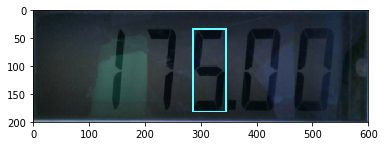

[[[552  99]]

 [[310 101]]

 [[312 159]]

 [[550 158]]]


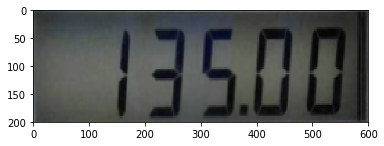

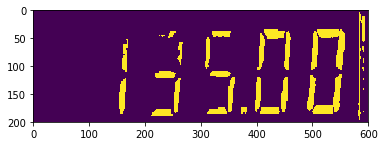

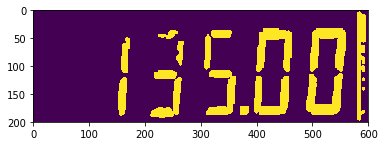

In [323]:
for file in image_list:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break
    
    print(displayCnt)
    
    # extract the thermostat display, apply a perspective transform to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    width = 600
    height = 200
    dim = (width, height)
    # resize image
    warped =  cv2.resize(warped, dim, interpolation = cv2.INTER_AREA)
    output = cv2.resize(output, dim, interpolation = cv2.INTER_AREA)
    plt.imshow(output)
    plt.show()
    
    
    output_bright_RGB = cv2.addWeighted(output, 9, output, 0,0)
    output_bright_grey = cv2.addWeighted(warped, 9, warped, 0,0)
    
    # threshold the warped image,
    thresh = cv2.threshold(output_bright_grey, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    plt.imshow(thresh)
    plt.show()
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(thresh,kernel,iterations = 1)

    # apply a series of morphological operations to cleanup the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
    plt.imshow(thresh)
    plt.show()
    
    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >=100 and h <= 180):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)
        plt.imshow(digit)
        plt.show()
        
    

In [ ]:
for file in image_list[0:1]:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break
    
    print(displayCnt)
    
    # extract the thermostat display, apply a perspective transform to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    plt.imshow(output)
    plt.show()
    
    
    output_bright_RGB = cv2.addWeighted(output, 9, output, 0,0)
    output_bright_grey = cv2.addWeighted(warped, 9, warped, 0,0)
    plt.imshow(output_bright_grey)
    plt.show()
     
    
    
    print("case 1 mean:" + str(np.mean(warped)))
    output_hist = cv2.equalizeHist(warped)
    plt.imshow(output_hist)
    plt.show()
    th3 = cv2.adaptiveThreshold(output_hist, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)    
    plt.imshow(th3)
    plt.show()
    kernel = np.ones((5,5),np.uint8)
    
       # apply a series of morphological operations to cleanup the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 100))
    plt.imshow(kernel)
    plt.show()
    thresh = cv2.morphologyEx(th3, cv2.MORPH_OPEN, kernel)
    plt.imshow(thresh)
    plt.show()    
    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >= 75 and h <= 150):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)
        plt.imshow(digit)
        plt.show()
        
        
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(75,75))
    cl1 = clahe.apply(warped)
    plt.imshow(cl1)
    plt.show()
    
    thresh = cv2.threshold(cl1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    plt.imshow(thresh)
    plt.show()    
    ernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 15))
    thresh = cv2.morphologyEx(cl1, cv2.MORPH_OPEN, kernel)

    # find contours in the thresholded image, then initialize the digit contours lists
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []

    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >= 75 and h <= 150):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(output,(x,y),(x+w,y+h),(100,255,255),2)




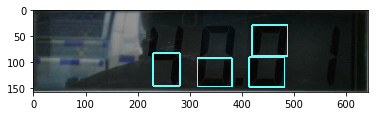

In [199]:
plt.imshow(digit)
plt.show()

In [177]:
digitCnts

[]

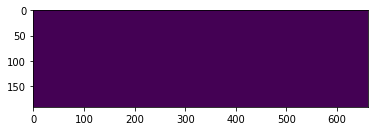

In [284]:
plt.imshow(thresh)

In [ ]:
for file in image_list:
    # load the example image
    image = cv2.imread(os.path.join(folder,file))
    # pre-process the image by resizing it, converting it to
    # graycale, blurring it, and computing an edge map
    image = imutils.resize(image, height=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200, 255)


    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the contour has four vertices, then we have found
        # the thermostat display
        if len(approx) == 4:
            displayCnt = approx
            break
    
    print(displayCnt)
    
    # extract the thermostat display, apply a perspective transform
    # to it
    warped = four_point_transform(gray, displayCnt.reshape(4, 2))
    output = four_point_transform(image, displayCnt.reshape(4, 2))
    plt.imshow(output)
    plt.show()
    
    
    output_bright_RGB = cv2.addWeighted(output, 9, output, 0,0)
    output_bright_grey = cv2.addWeighted(warped, 9, warped, 0,0)
    plt.imshow(output_bright_grey)
    plt.show()
    
    # threshold the warped image,
    ref = cv2.cvtColor(output, warped)
    ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]
    
    # find contours in the OCR-A image (i.e,. the outlines of the digits)
    # sort them from left to right, and initialize a dictionary to map
    # digit name to the ROI
    refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    refCnts = imutils.grab_contours(refCnts)
    refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
    digits = {}
    
    # loop over the digit area candidates
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # if the contour is sufficiently large, it must be a digit
        if w >= 20 and (h >= 75 and h <= 140):
            digitCnts.append(c)
    
    for c in digitCnts:
        (x, y, w, h) = cv2.boundingRect(c)
        print("x:"+ str(x))
        print("y:"+ str(y))
        print("w:"+ str(w))
        print("h:"+ str(h))

        digit =  cv2.rectangle(thresh,(x,y),(x+w,y+h),(100,255,255),2)
        plt.imshow(digit)
        plt.show()
    
    print("case 1 mean:" + str(np.mean(warped)))






In [84]:
displayCnt.shape

(4, 1, 2)